Jupyter Data Science Workflow

From exploratory analysis to reproducible science

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
import os
from urllib.request import urlretrieve
import pandas as pd


URL = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"

def get_fremont_data(filename='Fremont.csv', url=URL, force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(URL,'Fremont.csv')
    data = pd.read_csv('Fremont.csv',index_col='Date', parse_dates=True)
    data.columns = ['Total','East','West']
    return data
    

In [3]:
data = get_fremont_data()
data.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


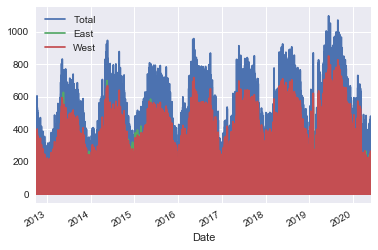

In [4]:
data.plot()# data plot for yearly

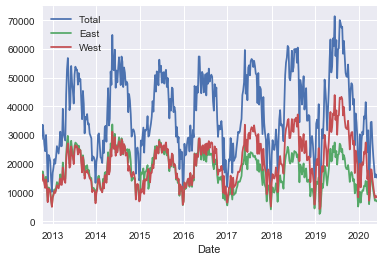

In [5]:
data.resample('w').sum().plot()# plot the data for weekly

Change the style of plot

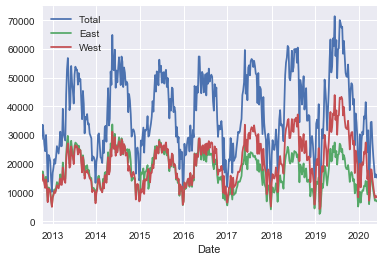

In [6]:
data.resample('w').sum().plot()# change the style of plot

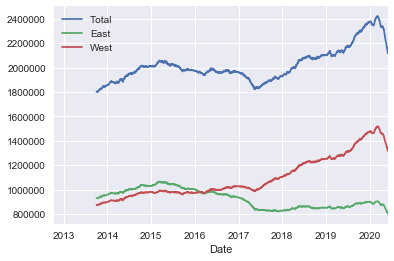

In [7]:
data.resample('D').sum().rolling(365).sum().plot();

(0, 2501427.25)

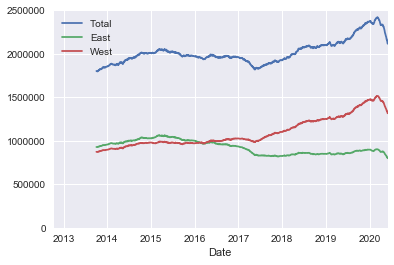

In [8]:
ax= data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None)# settting the limit for y axis

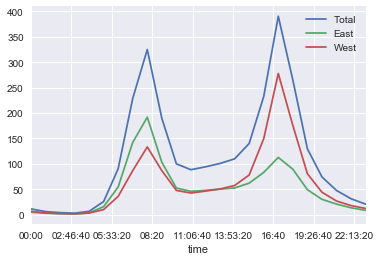

In [9]:
data.groupby(data.index.time).mean().plot()

In [10]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


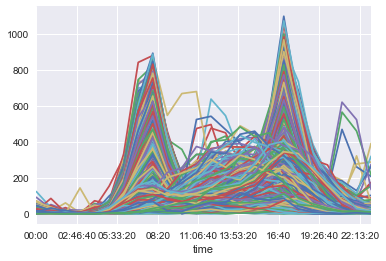

In [11]:
pivoted.plot(legend=False)

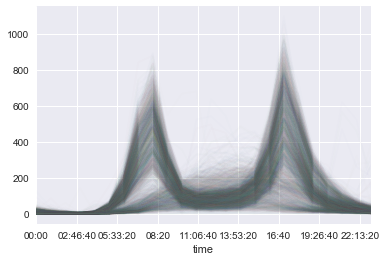

In [12]:
pivoted.plot(legend=False, alpha=0.01)